In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [248]:
def load_data(file_path, grandlabels):
    data = pd.read_csv(file_path, header=None)
    # Assign column names ["sepal length","sepal width","petal length","petal width","family"]
    data.columns = grandlabels
    return data

In [249]:
grandlabels = ["sepal length", "sepal width", "petal length", "petal width", "family"]
df = load_data("iris.csv",grandlabels)
# map the family names to numbers in the df 
family_mapping = { "Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor": 2 }
df['family'] = df['family'].map(family_mapping)
print(df)

     sepal length  sepal width  petal length  petal width  family
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       1
146           6.3          2.5           5.0          1.9       1
147           6.5          3.0           5.2          2.0       1
148           6.2          3.4           5.4          2.3       1
149           5.9          3.0           5.1          1.8       1

[150 rows x 5 columns]


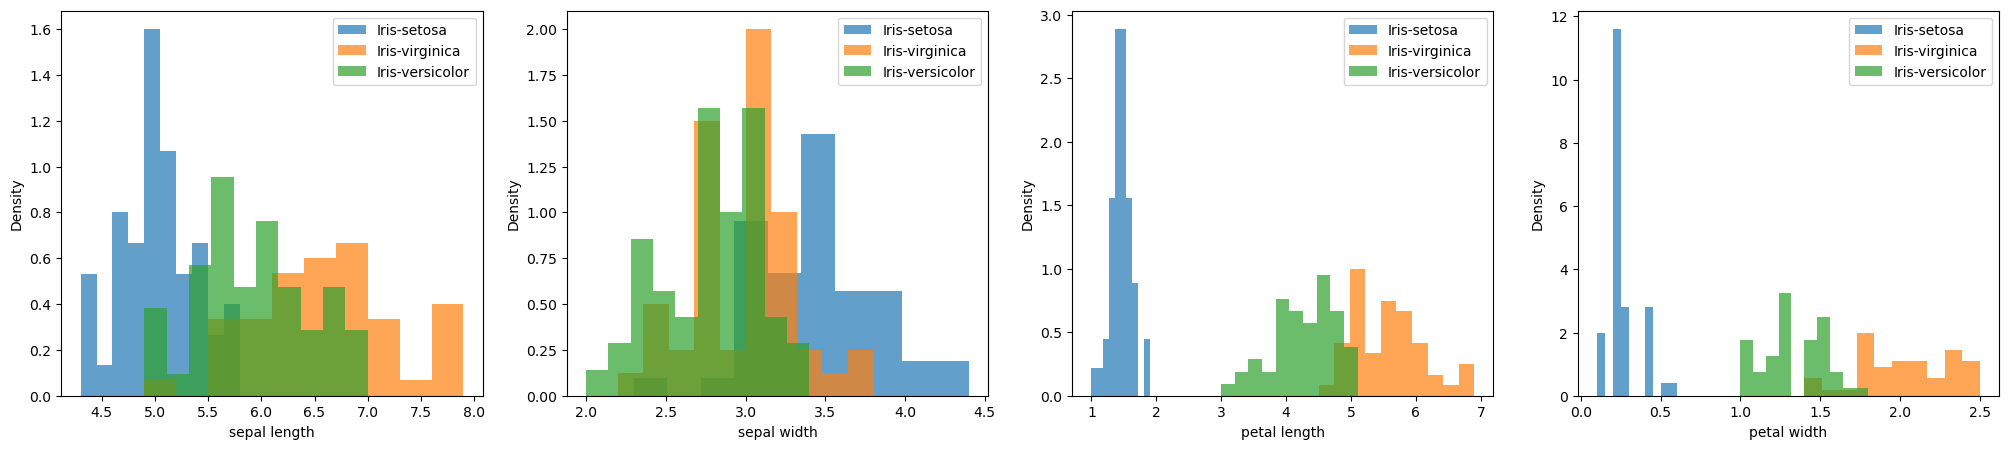

In [250]:
# plot histogram of the sepal length
# change the color of the element depending on the family

columns = len(df.columns)-1


fig, axs = plt.subplots(1, columns, figsize=(25, 5))

for j,grandlabel in enumerate(grandlabels[:-1]):
    axs[j].set_xlabel(grandlabel)
    axs[j].set_ylabel('Density')
    for k,v in family_mapping.items():
        axs[j].hist(df[grandlabel.lower()][df['family'] == v], bins=10, alpha=0.7, density=True,label = k)
    axs[j].legend()
plt.show()

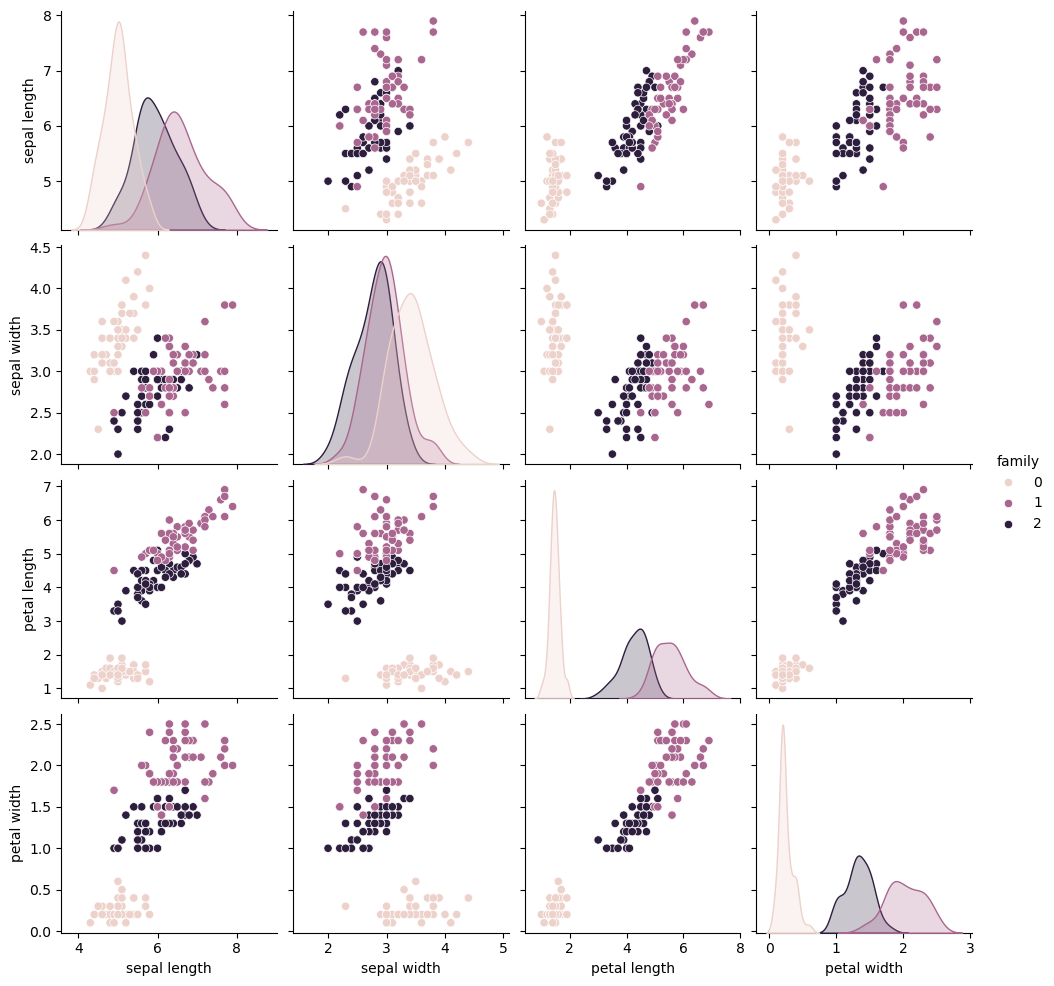

In [251]:
# plots with each combination of the four features
# create a pairplot with the four features and the family as hue, frequency normalized
sns.pairplot(df, hue="family", diag_kind="auto")
plt.show()

In [252]:

print("Means")


localdf = df.loc[:, df.columns != "family"] 
mean = localdf.mean()
print(mean)

#print the data types of the df columns
#print("Data types:")
#print(df.dtypes)

print(mean.index)
df[mean.index] = df[mean.index] - mean

print((localdf.T @ localdf)/len(localdf))
print("")
var = localdf.var()
print("Variance")
print(var)
print()

std = localdf.std()
print("Standard deviation")
print(std)
print("")



Means
sepal length    5.843333
sepal width     3.057333
petal length    3.758000
petal width     1.199333
dtype: float64
Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')
              sepal length  sepal width  petal length  petal width
sepal length     34.825667    17.822867     23.225067     7.520933
sepal width      17.822867     9.536000     11.162000     3.545933
petal length     23.225067    11.162000     17.218067     5.794067
petal width       7.520933     3.545933      5.794067     2.015533

Variance
sepal length    0.685694
sepal width     0.189979
petal length    3.116278
petal width     0.581006
dtype: float64

Standard deviation
sepal length    0.828066
sepal width     0.435866
petal length    1.765298
petal width     0.762238
dtype: float64



In [253]:
# pandas dataframe minus corresponding mean of each column

print("Dataframe minus mean")
print(df)
print("")


Dataframe minus mean
     sepal length  sepal width  petal length  petal width  family
0       -0.743333     0.442667        -2.358    -0.999333       0
1       -0.943333    -0.057333        -2.358    -0.999333       0
2       -1.143333     0.142667        -2.458    -0.999333       0
3       -1.243333     0.042667        -2.258    -0.999333       0
4       -0.843333     0.542667        -2.358    -0.999333       0
..            ...          ...           ...          ...     ...
145      0.856667    -0.057333         1.442     1.100667       1
146      0.456667    -0.557333         1.242     0.700667       1
147      0.656667    -0.057333         1.442     0.800667       1
148      0.356667     0.342667         1.642     1.100667       1
149      0.056667    -0.057333         1.342     0.600667       1

[150 rows x 5 columns]



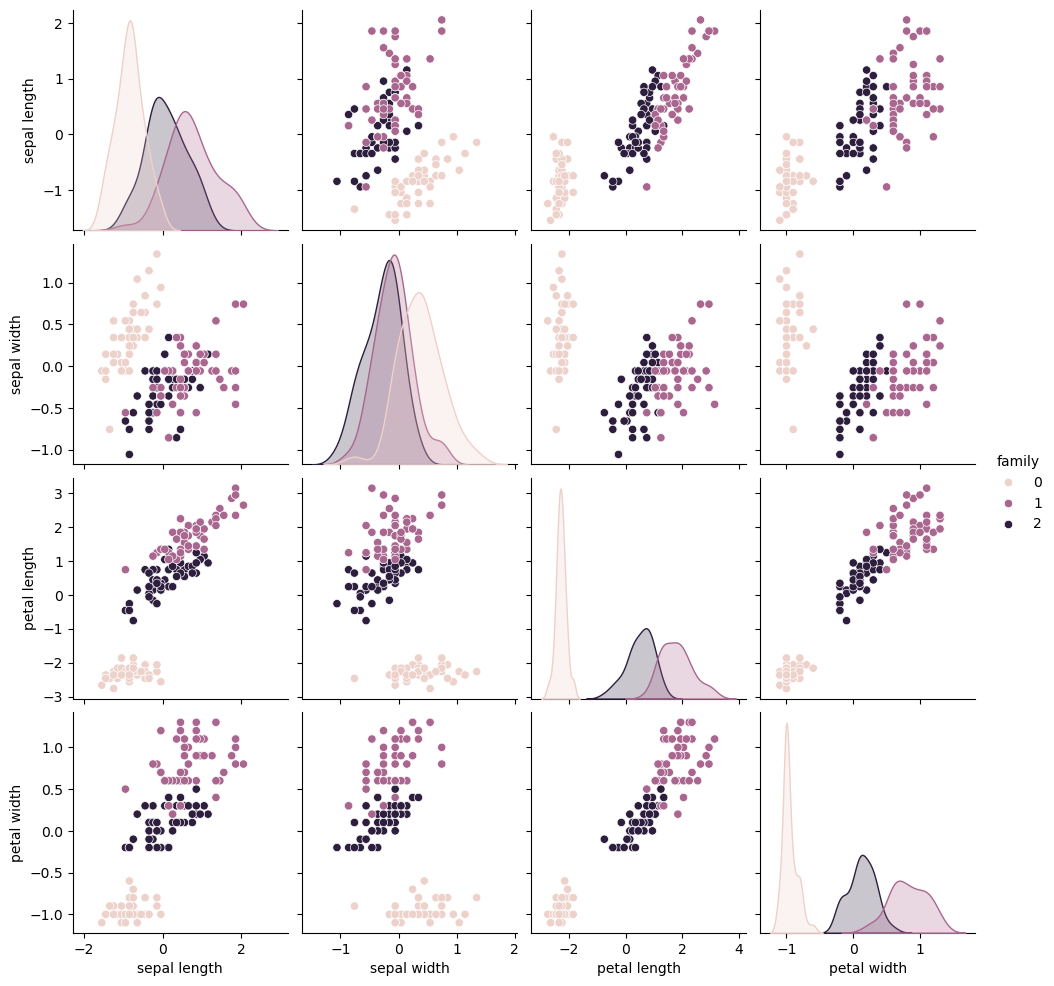

In [254]:

# add column family to localdf
sns.pairplot(df, hue="family", diag_kind="auto")
plt.show()

In [255]:
for i in range(3):

    localdf = df[df["family"]==i].drop(columns=["family"])
    print(f"Family: {i}")
    print((localdf.T @ localdf)/len(df))
    print("")
    var = localdf.var()
    print("Variance")
    print(var)
    print()

    std = localdf.std()
    print("Standard deviation")
    print(std)
    print("")


Family: 0
              sepal length  sepal width  petal length  petal width
sepal length      0.274297    -0.071047      0.646182     0.269461
sepal width      -0.071047     0.092737     -0.279862    -0.114752
petal length      0.646182    -0.279862      1.767057     0.731600
petal width       0.269461    -0.114752      0.731600     0.306576

Variance
sepal length    0.124249
sepal width     0.143690
petal length    0.030159
petal width     0.011106
dtype: float64

Standard deviation
sepal length    0.352490
sepal width     0.379064
petal length    0.173664
petal width     0.105386
dtype: float64

Family: 1
              sepal length  sepal width  petal length  petal width
sepal length      0.316928     0.009944      0.544385     0.221234
sepal width       0.009944     0.036289     -0.026516    -0.007404
petal length      0.544385    -0.026516      1.172311     0.510296
petal width       0.221234    -0.007404      0.510296     0.252434

Variance
sepal length    0.404343
sepal width   